In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [231]:
class Point:
    """
    Класс точка, что-бы проще было хранить точки
    """
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.check_borders()

    # function to add two vectors
    def __add__(self, other):
        return Point(self.x+other.x, self.y+other.y)

    def __call__(self,x,y):
        return Point(x,y)
    
    def check_borders(self): # Можно в класс точку убрать
        if ( (self.x < 0) and (self.y < 0) and (self.y > y_max)):
            print('I am out')
    
    # function to subtract vectors
    def __sub__(self, other):
        return Point(self.x-other.x, self.y-other.y)

In [232]:
y_max = 100
def check_borders(Point): # Можно в класс точку убрать
    """
    Проверяем в пределах ли рамки наша точка, то есть True - все хорошо
    """
    return (Point.x > 0) and (Point.y > 0) and (Point.y < y_max)

In [233]:
# function to rotate a vector by a certain angle
def rotate_point(vec, angle, deg=False):
    cos_angle = np.cos(angle)
    sin_angle = np.sin(angle)
    rotated_point = Point(vec.x*cos_angle - vec.y*sin_angle, vec.x*sin_angle + vec.y*cos_angle)
    return rotated_point

In [234]:
class rectangle:
    def __init__(self,Point,width,height,angle=0):
        self.Point_A = Point
        self.width = width
        self.height = height
        self.angle = angle
        
        # calcalute other point
        self.Point_B = self.Point_A + rotate_point(Point(self.width, 0), self.angle)
        self.Point_C = self.Point_A + rotate_point(Point(self.width,self.height), self.angle)
        self.Point_D = self.Point_A + rotate_point(Point(0, height), self.angle)
        
        self.Points = [self.Point_A,self.Point_B,self.Point_C,self.Point_D]

In [235]:
def draw_rects(rect1, rect2):
    def set_xy(rect):
        xy = np.array([[rect.Point_A.x, rect.Point_A.y], [rect.Point_B.x, rect.Point_B.y], [rect.Point_C.x, rect.Point_C.y],
                       [rect.Point_D.x, rect.Point_D.y]])
        xs = xy[:, 0]
        ys = xy[:, 1]
        return xy, xs, ys
    
    #print(rect1)
    #print(rect2)
    xy1, xs1, ys1 = set_xy(rect1)
    xy2, xs2, ys2 = set_xy(rect2)
    
    plt.figure(figsize=(6, 6))
    plt.scatter(xs1, ys1, s=70, color='red')
    plt.scatter(xs2, ys2, s=70, color='blue')

    r1 = plt.Polygon(xy1, color='red', fill=0)
    r2 = plt.Polygon(xy2, color='blue', fill=0)
    plt.gca().add_patch(r1)
    plt.gca().add_patch(r2)
    plt.xlim(-5, 10)
    plt.ylim(-5, 10)
    plt.show()

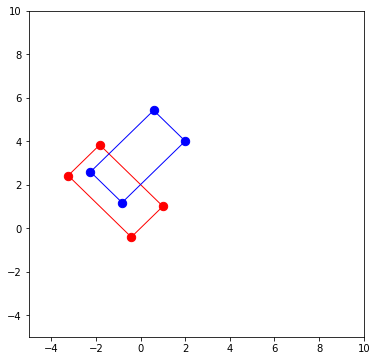

In [236]:
draw_rects(rectangle(Point(1,1),4,2,3*np.pi/4),rectangle(Point(2,4),2,4, 3*np.pi/4))

In [237]:
def check_lines(Point_A_1,Point_A_2,Point_B_1,Point_B_2):
    # Первое при x, второе при y 
    coeff = np.array([[Point_A_1.y - Point_A_2.y,Point_A_2.x - Point_A_1.x],
                      [Point_B_1.y - Point_B_2.y,Point_B_2.x - Point_B_1.x]])
    free = np.array([-Point_A_1.x*Point_A_2.y + Point_A_2.x*Point_A_1.y,
                    -Point_B_1.x*Point_B_2.y + Point_B_2.x*Point_B_1.y])
    try:
        ans = np.linalg.solve(coeff, free) # Не знаю аналога в JS, но тут 
    #описание https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html
    except np.linalg.LinAlgError:
        #print('Не пересекаются')
        return False
    else: # Они не работают :(
        if (ans[0] >= min(Point_A_1.x,Point_A_2.x) and ans[0] <= max(Point_A_1.x,Point_A_2.x) and # Лежит ли на первой линии по х
           ans[0] >= min(Point_B_1.x,Point_B_2.x) and ans[0] <= max(Point_B_1.x,Point_B_2.x) and # Вторая по x
           ans[1] >= min(Point_A_1.y,Point_A_2.y) and ans[1] <= max(Point_A_1.y,Point_A_2.y) and # Первая  по y
           ans[1] >= min(Point_B_1.y,Point_B_2.y) and ans[1] <= max(Point_B_1.y,Point_B_2.y)):# Вторая по у
            #print('Не пересекаются')
            return ans
        else:
            #print('Пересечение')
            return False

In [238]:
check_lines(Point(1,1),Point(1,2),Point(0,0),Point(1,0))

False

In [239]:
def check_rectangle(rect1,rect2):
    cross_points = []
    # Переопределяем range
    def special_range(n):
        i = 0
        while i < n:
            yield i
            i += 1
        yield -1
    
    for i in special_range(len(rect1.Points)):
        for j in special_range(len(rect2.Points)):
            point = check_lines(rect1.Points[i-1],rect1.Points[i],rect2.Points[j-1],rect2.Points[j])
            if type(point) != bool:
                cross_points.append(point)
    return cross_points

In [240]:
def all_check(rect1, rect2):
    points = check_rectangle(rect1,rect2)
    
    x = [point[0] for point in points]
    y = [point[1] for point in points]
    
    def set_xy(rect):
        xy = np.array([[rect.Point_A.x, rect.Point_A.y], [rect.Point_B.x, rect.Point_B.y], [rect.Point_C.x, rect.Point_C.y],
                       [rect.Point_D.x, rect.Point_D.y]])
        xs = xy[:, 0]
        ys = xy[:, 1]
        return xy, xs, ys
    
    #print(rect1)
    #print(rect2)
    xy1, xs1, ys1 = set_xy(rect1)
    xy2, xs2, ys2 = set_xy(rect2)
    
    plt.figure(figsize=(6, 6))
    plt.scatter(xs1, ys1, s=70, color='red')
    plt.scatter(xs2, ys2, s=70, color='blue')
    plt.scatter(x, y, s=70, color='green')
    

    r1 = plt.Polygon(xy1, color='red', fill=0)
    r2 = plt.Polygon(xy2, color='blue', fill=0)
    plt.gca().add_patch(r1)
    plt.gca().add_patch(r2)
    plt.xlim(-5, 10)
    plt.ylim(-5, 10)
    plt.show()

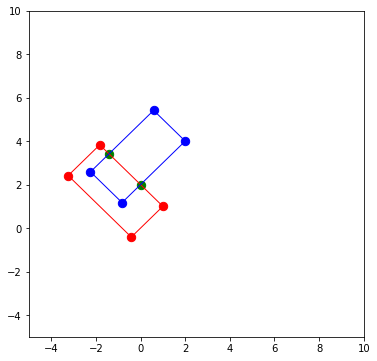

In [241]:
all_check(rectangle(Point(1,1),4,2,3*np.pi/4),rectangle(Point(2,4),2,4, 3*np.pi/4))

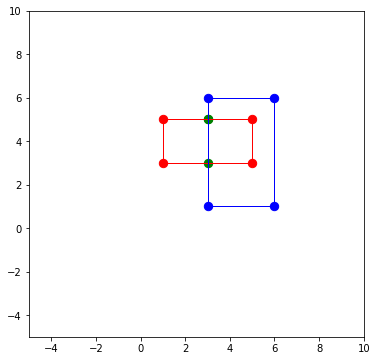

In [242]:
all_check(rectangle(Point(1,3),4,2),rectangle(Point(3,1),3,5))

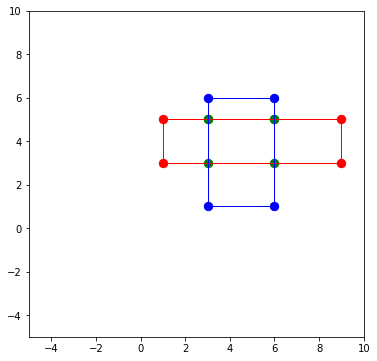

In [243]:
all_check(rectangle(Point(1,3),8,2),rectangle(Point(3,1),3,5))

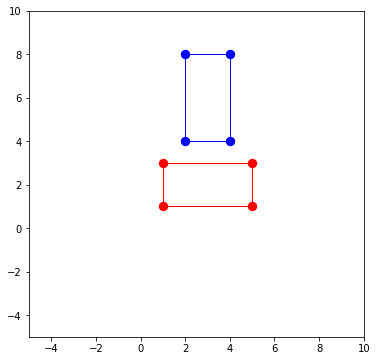

In [244]:
all_check(rectangle(Point(1,1),4,2),rectangle(Point(2,4),2,4))

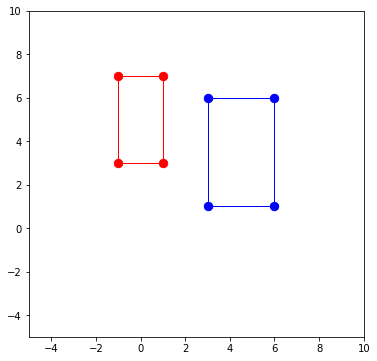

In [245]:
all_check(rectangle(Point(1,3),4,2,np.pi/2),rectangle(Point(3,1),3,5))

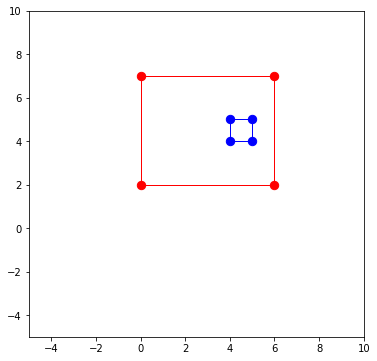

In [246]:
all_check(rectangle(Point(0,2),6,5),rectangle(Point(4,4),1,1))